# AM207 Homework 1

### Chris En and Ethan Zou

##### Data: wine_quality_missing.csv

**Harvard University**<br>
**Fall 2018**<br>
**Instructors: Rahul Dave**<br>
**Due Date: ** Saturday, September 15th, 2018 at 11:59pm



**Instructions:**

- Upload your final answers as well as your iPython notebook containing all work to Canvas.

- Structure your notebook and your work to maximize readability.


In [24]:
import numpy as np
import scipy.stats
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from IPython.display import display
from matplotlib import cm
import pandas as pd
import seaborn.apionly as sns
%matplotlib inline

/anaconda3/lib/python3.6/site-packages/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


## Question 1: Don't Be Sensitive, We're Looking For False Positivity

**Coding not required**

As the U.S. aims to increase early identification and treatment of people with HIV, a greater focus has been placed on determining the accuracy of HIV tests in real-world settings in order to better identify individuals during the early (acute) stages of infection when transmission risk is especially high.  In order to quantify this, researchers from the University of California, San Francisco conducted a review of over 21,234 HIV tests given between the years 2003 and 2008 in some of the city's highest prevalence populations.  Two of the tests included in the study -- the OraQuick Advance Blood Rapid Antibody Test (a 3rd generation fingerstick blood test we'll henceforth call the **BRT**) and the OraQuick Advance Saliva Rapid Antibody Test (a 3rd generation saliva test we'll henceforth call the **SRT**) -- can be considered Rapidly Administered tests.  According to Wikipedia, the overall prevalence of adult HIV in the United States is 0.3%

You and your partner decide to undergo tests for HIV and the two of you are administered the SRT at an HIV screening clinic.  You're aware that the test you've been administered (one of the tests featured in the study) has a sensitivity (true positive rate) of 86.6% and a specificity (true negative rate) of 98.6%.

1.1. In the unfortunate event that your partner tests positive what is the probability that he/she has HIV?

1.2. Should you be concerned enough to ask for further testing or treatment for your partner?  Justify your answer quantitatively.

1.3. The medical staff at the screening clinic decides to independently administer the BRT as it is the only other test they can administer on site.  Based on the UCSF study above, you're aware that this test has a sensitivity (true positive rate) of 91.9% and a specificity of 99.6%.  What is the probability that your partner has the HIV if both tests come up positive (Make the assumption that the independent administration means that the tests are independent of each other)?

It turns out the screening clinic didn't have the second test and you and your partner were only able to be administered the SRT. However, on your way home you're reminded that your partner has spent almost all his/her life in the Bahamas where the prevalence of adult HIV is 3.3%.

1.4. What is the probability that your Bahamian partner has HIV given that he/she received a positive test result on the SRT?

1.5. How does the new information quantifiably affect your decision of whether you should  be concerned enough to ask for treatment or testing for your partner?

*Make sure to justify your decisions using your calculations.*

**Solution**:

<div class="answer-separator">
------------------------
</div>

<h4>1.1. In the unfortunate event that your partner tests positive what is the probability that he/she has HIV?</h4>

<div class="answer">
<br>
Using Bayes' Theorem, we can write (where $X$ is the event that my partner has HIV, and $A$ is the event that the test returns positive):

$$P(X|A) = \frac{P(A|X)P(X)}{P(A)}$$

The sensitivity is $P(A|X) = 0.866$, the prior probability of HIV is $P(X) = 0.003$, and the probability of a positive test result is $P(A) = P(A|X)P(X) + P(A|X^c)P(X^c) = (0.866)(0.003) + (0.014)(0.997)$. Thus, we have

$$P(X|A) = \frac{(0.866)(0.003)}{(0.866)(0.003) + (0.014)(0.997)} = \boxed{0.157}$$
<br>
</div>

<div class="answer-separator">
------------------------
</div>

<h4>1.2. Should you be concerned enough to ask for further testing or treatment for your partner?  Justify your answer quantitatively.</h4>

<div class="answer">

<br>
I would be concerned enough to ask for further testing - there is about a 1 in 6 chance of HIV, which is significant, though perhaps not significant enough to immediately get treatment without further confirmation.
<br>

</div>

<div class="answer-separator">
------------------------
</div>

<h4>1.3. The medical staff at the screening clinic decides to independently administer the BRT as it is the only other test they can administer on site.  Based on the UCSF study above, you're aware that this test has a sensitivity (true positive rate) of 91.9% and a specificity of 99.6%.  What is the probability that your partner has the HIV if both tests come up positive (Make the assumption that the independent administration means that the tests are independent of each other)?</h4>

<div class="answer">

<br>
Let $B$ be the event that the BRT is positive. First, we can write by (conditional) independence that

$$P(X|A\cap B) = \frac{P(A\cap B | X)P(X)}{P(A\cap B)} = \frac{P(A|X)P(B|X)P(X)}{P(A\cap B)}$$

We know that $P(A|X) = 0.866$, $P(B|X) = 0.919$, $P(X) = 0.003$, and (by conditional independence) that $P(A\cap B) = P(A|X)P(B|X)P(X) + P(A|X^c)P(B|X^c)P(X^c) = (0.866)(0.919)(0.003) + (0.014)(0.004)(0.997)$. This gives us

$$P(X|A\cap B) = \frac{(0.866)(0.919)(0.003)}{(0.866)(0.919)(0.003) + (0.014)(0.004)(0.997)} = \boxed{0.977}$$
<br>




</div>

<div class="answer-separator">
------------------------
</div>

<h4>1.4. What is the probability that your Bahamian partner has HIV given that he/she received a positive test result on the SRT?</h4>

<div class="answer">

<br>
Similar to part 1.1, we can write (where $C$ is the event that my partner is Bahamian)

$$P(X|A, C) = \frac{P(A|X, C)P(X|C)}{P(A|C)}$$

Note that $P(A|X,C) = P(A|X) = 0.866$, $P(X|C) = 0.033$, and $P(A|C) = P(A|X)P(X|C) + P(A|X^c)P(X^c|C) = (0.866)(0.033) + (0.014)(0.967)$. This gives us

$$P(X|A,C) = \frac{(0.866)(0.033)}{(0.866)(0.033) + (0.014)(0.967)} = \boxed{0.679}$$
<br>

</div>

<div class="answer-separator">
------------------------
</div>

<h4>1.5. How does the new information quantifiably affect your decision of whether you should  be concerned enough to ask for treatment or testing for your partner?</h4>

<div class="answer">

<br>
Now, we should be highly concerned, and definitely ask for further treatment as soon as possible. The chance of HIV has quadrupled to more than a 2/3 chance, which is extremely significant.
<br>

</div>

<div class="answer-separator">
------------------------
</div>

## Question 2: Visualize Yourself Missing Your Data

**Some Coding required**

Missing data is a very important topic in statistics and machine learning and we may touch upon it a few times throughout the course. Let us begin to explore how to handle missing data in our analysis.  We'll be working with a dataset from the UCI Machine Learning Repository that uses a variety of wine chemical predictors to classify wines grown in the same region in Italy.  Each line represents 13 (mostly chemical) predictors of the response variable wine class, including things like alcohol content, hue, and phenols.  Unfortunately some of the predictor values were lost in measurement.  You'll find the dataset in a file called `wine_quality_missing.csv`.

2.1. Read the data in the `wine_quality_missing.csv` into a pandas dataframe and store the dataframe in the variable `wine_df`.  How many observations are in the dataset?  

2.2. One way to handle missing data is to just totally ignore it by removing any rows that have any missing values.  This is called *drop imputation*.  Use drop imputation on our wine quality dataframe and store the resulting dataframe in the variable `wine_drop`.  How many observations does the drop imputed dataset have?

2.3. Visualize using a normed histogram the values of Ash predictor in the drop imputed dataframe.  Overlay a fitted normal distribution on your plot.  Make sure to title the plot, include a legend and label axes.

2.4. What are the mean and standard deviation of the values of the Ash feature in your drop imputed dataset?

2.5. Another way to handle missing data is to replace any missing value with the mean of the non-missing values in that *column*.  This is called *mean imputation*.  How many rows does our mean imputed dataset have?

2.6. Visualize using a normed histogram the values of Ash predictor in the mean imputed dataframe.  Overlay a fitted normal distribution on your plot.  Make sure to title the plot, include a legend and label axes.

2.7. What are the mean and standard deviation of the Ash predictor values in your mean imputed dataset?  How do they compare to the mean and standard deviation of the drop imputed dataset?


In [22]:
# 2.1
wine_df = pd.read_csv('wine_quality_missing.csv')
display(wine_df.head())
display(len(wine_df))

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1
1,13.20,1.78,2.14,NaN,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1
3,14.37,1.95,2.50,NaN,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,NaN,4.32,1.04,2.93,735.0,1


178

In [13]:
# 2.2
wine_drop = wine_df.dropna()
len(wine_drop)

43

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


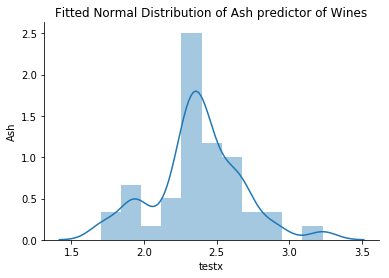

In [40]:
# 2.3
# legend???
wine_drop_ash = wine_drop['Ash']
plt.hist(wine_drop_ash, bins=20)
plt.clf()
sns.distplot(wine_drop_ash)
plt.title("Fitted Normal Distribution of Ash predictor of Wines")
plt.xlabel("testx")
plt.ylabel("Ash")
sns.despine()

In [52]:
# 2.4
wine_ash_drop_mean = np.mean(wine_drop_ash)
wine_ash_drop_std = np.std(wine_drop_ash)
display(wine_ash_drop_mean)
display(wine_ash_drop_std)

2.369767441860465

0.2996857918281887

In [50]:
# 2.5
wine_fill = wine_df['Ash'].fillna(wine_ash_mean)
len(wine_fill)

178

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


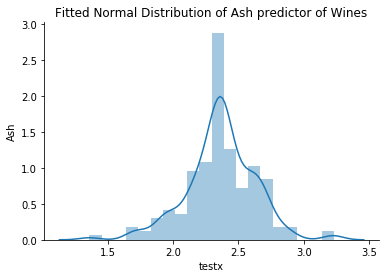

In [51]:
# 2.6
plt.hist(wine_fill, bins=20)
plt.clf()
sns.distplot(wine_fill)
plt.title("Fitted Normal Distribution of Ash predictor of Wines")
plt.xlabel("testx")
plt.ylabel("Ash")
sns.despine()

In [54]:
# 2.7
wine_ash_fill_mean = np.mean(wine_fill)
wine_ash_fill_std = np.std(wine_fill)
display(wine_ash_fill_mean)
display(wine_ash_fill_std)

2.3666566501175854

0.26427887368845354

## Part 3: Walk Softly and Carry a Broken Stick  

**Some Coding required**

3.1  A well-known probability problem, the **Broken Stick Problem** can be formulated as follows. *A stick is broken up at two points, chosen at random along its
length. Show that the probability that the pieces obtained form a triangle is 1/4.*  Write a function `simulate_broken_stick` that runs takes an integer parameter `n_sims`, runs that many simulations of the broken stick problem and returns a floating point number representing an estimate of the probability that the pieces of a stick randomly broken in two places form a triangle.  

**Hints**:

1. Use either np.random.rand or scipy.stats.uniform.rvs to simulate stick-breaking
2. Think about the triangle inequality

3.2 Run your function `simulate_broken_stick` with `n_sims` set to be equal to 50 and 1000.  What are your two estimates of the solution to the broken stick problem?

3.3 (Optional) Provide an analytic proof of the **Broken Stick Problem**.

**Hints**:

1. There's a very nice geometric proof taking advantage of [Viviani's Theorem][1].  Argue that every point in the equilateral triangle with height equal to the length of the stick maps to a particular breaking of the stick.  Divide the equilateral triangle into subtriangles by joining the midpoints.  What does it mean for a point to be outside the central equilateral subtriangle?
2. There's a more straightforward proof treating the breaking of the stick as joint uniform random variables.  What conditions does the triangle inequality impose on the joint random variable? How do you calculate the probability that the joint uniform meets those conditions? 

[1]: https://en.wikipedia.org/wiki/Viviani%27s_theorem

**Solution**:

<h4> 3.1  A well-known probability problem, the **Broken Stick Problem** can be formulated as follows. *A stick is broken up at two points, chosen at random along its
length. Show that the probability that the pieces obtained form a triangle is 1/4.*  Write a function `simulate_broken_stick` that runs takes an integer parameter `n_sims`, runs that many simulations of the broken stick problem and returns a floating point number representing an estimate of the probability that the pieces of a stick randomly broken in two places form a triangle.</h4>

In [68]:
def simulate_broken_stick(n_sims=500):
    
    # define your probability estimate and initialize it to 0
    probability_estimate = 0
    
    # run your simulation and calculate probability_estimate
    num_successes = 0
    for i in range(n_sims):
        x, y = np.random.uniform(0, 1, 2)
        a = min(x, y)
        b = max(x, y)
        side1 = a
        side2 = b - a
        side3 = 1 - b
        if side1 + side2 > side3 and side2 + side3 > side1 and side1 + side3 > side2:
            num_successes += 1
    
    probability_estimate = float(num_successes/n_sims)
    
    return probability_estimate
simulate_broken_stick(10000)

0.2496

<h4>3.2 Run your function `simulate_broken_stick` with `n_sims` set to be equal to 50 and 1000.  What are your two estimates of the solution to the broken stick problem?</h4>

In [71]:
estimate_50 = simulate_broken_stick(n_sims=50)  # calculate estimate for 50 simulations
estimate_1000 = simulate_broken_stick(n_sims=1000)  # calculate estimate for 1000 simulations

In [72]:
## Make sure you present your answers somewhere here
display(estimate_50)
display(estimate_1000)

0.26

0.253

<h4>3.3 (Optional) Provide an analytic proof of the **Broken Stick Problem**.</h4>

<div class="answer">

<br>
If we wrapped the stick around into a circle by connecting its endpoints, then the broken segments form a triangle if and only if the two break points and the endpoints of the stick cannot be contained in the same semicircle. To see this, if they all lie in the same semicircle, then the opposing semicircle corresponds to a broken segment of length at least 1/2, which must be greater than the sum of the other two broken segments. If the endpoints (which are combined in one point in the circle) and the two break points can form a triangle, then notice that each segment has length $\le 1/2$, and any pair of segments add to a combined length of $\ge 1/2$. This means that any semicircle cannot contain all three points, because to do so it would have to contain two entire segments.

Thus, the probability of the broken segments forming a triangle is equal to the probability that three randomly chosen points on a circle cannot be contained in the same semicircle. Consider the event that all three points do lie on the same semicircle. This is true if and only if they all lie on a semicircle with the clockwise endpoint at exactly one of the three points - to see the forward direction, any semicircle containing the three points can be rotated counterclockwise until its clockwise endpoint reaches a point. Further rotating until the clockwise endpoint is at the second point will cause the semicircle to no longer contain the first point, since the total rotation must be less than $\pi$. Similarly, the total rotation from the second to the third point must be less than $\pi$, and so the semicircle with the clockwise end at the third point cannot contain the second point. Thus, the three events that the semicircle with the clockwise endpoint at each of the three points contains all three points are mutually exclusive. Notice that each of these events has probability 1/4: given a semicircle starting at one point, the probability that each of the other two points lies in the semicircle is 1/2. Thus, the probability that any one of these semicircles contains all three points is $1/4 + 1/4 + 1/4 = 3/4$, which is also the probability that all three points lies in the same semicircle. We conclude that the probability that the broken segments can form a triangle is $1-3/4 = 1/4$.
<br>

</div>